# Analysis of correct answers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_google = pd.read_excel('data/Google_.xlsx')
df_gpt = pd.read_excel('data/ChatGPT_.xlsx')

# set id to index
df_google.set_index('ID', inplace=True)
df_gpt.set_index('ID', inplace=True)

# drop columns
df_google.drop(columns=['Email', 'Name', 'Quiz feedback'], inplace=True)
df_gpt.drop(columns=['Email', 'Name', 'Quiz feedback', 'Last modified time'], inplace=True)

# remove columns starting with "Feedback"
df_google = df_google.loc[:, ~df_google.columns.str.startswith('Feedback')]
df_gpt = df_gpt.loc[:, ~df_gpt.columns.str.startswith('Feedback')]

# Save for later
df_google_copy = df_google.copy()
df_gpt_copy = df_gpt.copy()

# only keep columns starting with "Points"
df_google = df_google.loc[:, df_google.columns.str.startswith('Points')]
df_gpt = df_gpt.loc[:, df_gpt.columns.str.startswith('Points')]

# Replace column names with the question number
df_google.columns = [f'Q{i+1}' for i in range(len(df_google.columns))]
df_gpt.columns = [f'Q{i+1}' for i in range(len(df_gpt.columns))]

# Calculate the total points
df_google['Total'] = df_google.sum(axis=1)
df_gpt['Total'] = df_gpt.sum(axis=1)


In [2]:
# Summary statistics 
print("Google")
#df_google["accuracy"] = df_google["Total"] / 21
display(df_google["Total"].describe())

Google


count    17.000000
mean     12.529412
std       2.452490
min       8.000000
25%      11.000000
50%      13.000000
75%      14.000000
max      16.000000
Name: Total, dtype: float64

In [3]:
print("GPT")
display(df_gpt["Total"].describe())

GPT


count    16.000000
mean     11.187500
std       2.104559
min       7.000000
25%       9.750000
50%      12.000000
75%      12.250000
max      15.000000
Name: Total, dtype: float64

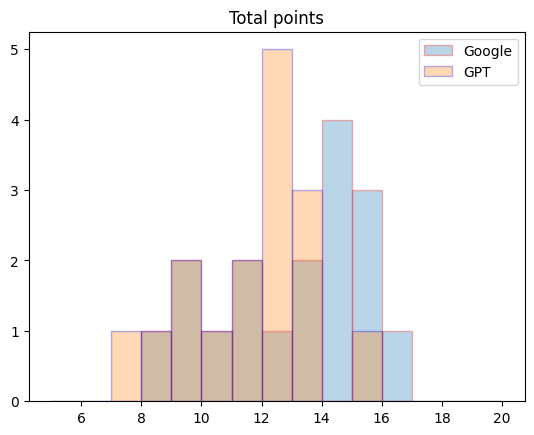

In [4]:
# make histogram of total points
plt.hist(df_google["Total"]+ 0.12, bins=range(5, 21, 1), alpha=0.3, label='Google', edgecolor = 'r')
plt.hist(df_gpt["Total"], bins=range(5, 21, 1), alpha=0.3, label='GPT', edgecolor = 'b')
plt.title('Total points')
plt.legend()
plt.show()

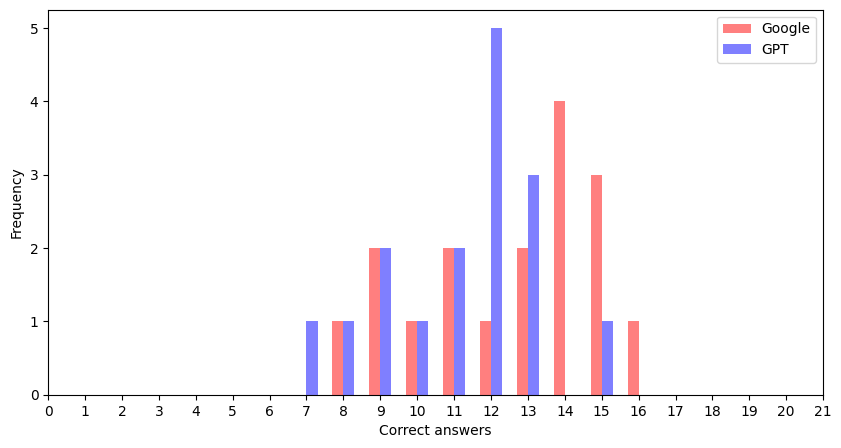

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_google and df_gpt are defined and contain a column "Total"
fig, ax = plt.subplots(figsize=(10, 5))

# Get value counts and sort by index
google_counts = df_google["Total"].value_counts().sort_index()
gpt_counts = df_gpt["Total"].value_counts().sort_index()

# Define x positions for the bars
x_positions = google_counts.index
x_positions1 = gpt_counts.index

# Plot bars for Google and GPT, with slight adjustments to avoid overlap
ax.bar(x_positions - 0.15, google_counts, label="Google", width=0.3, color='red', alpha=0.5)
ax.bar(x_positions1 + 0.15, gpt_counts, label="GPT", width=0.3, color='blue', alpha=0.5)

# Set x-axis ticks and labels
ax.set_xticks(np.arange(0, 22))
ax.set_xlabel("Correct answers")
ax.set_ylabel("Frequency")
ax.legend()

# Save the figure and show it
plt.savefig("figs/accuracy_total.pdf", bbox_inches='tight')
plt.show()

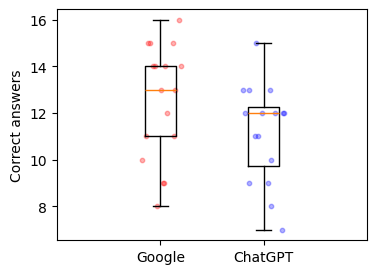

In [6]:
# Make box plot over total 
import random
random.seed(10)

positions = [0, 0.5]
plt.figure(figsize=(4, 3))
plt.boxplot([df_google["Total"], df_gpt["Total"]], tick_labels=["Google", "ChatGPT"], positions=positions)
# plot datapoints on top
datapoints_google_jitter = [positions[0]]*len(df_google["Total"])
datapoints_google_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_google_jitter]

datapoints_gpt_jitter = [positions[1]]*len(df_gpt["Total"])
datapoints_gpt_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_gpt_jitter]
plt.scatter(datapoints_google_jitter, df_google["Total"], alpha=0.3,s = 10, color='r', label='N =' + str(len(df_google["Total"])))
plt.scatter(datapoints_gpt_jitter, df_gpt["Total"], alpha=0.3, s=10, color='b', label='N = '+ str(len(df_gpt["Total"])))
plt.ylabel("Correct answers")
#plt.title("Total points for Google and GPT")
#plt.legend(loc='upper right')
plt.savefig("figs/boxplot_total_points.pdf", bbox_inches='tight')
plt.show()


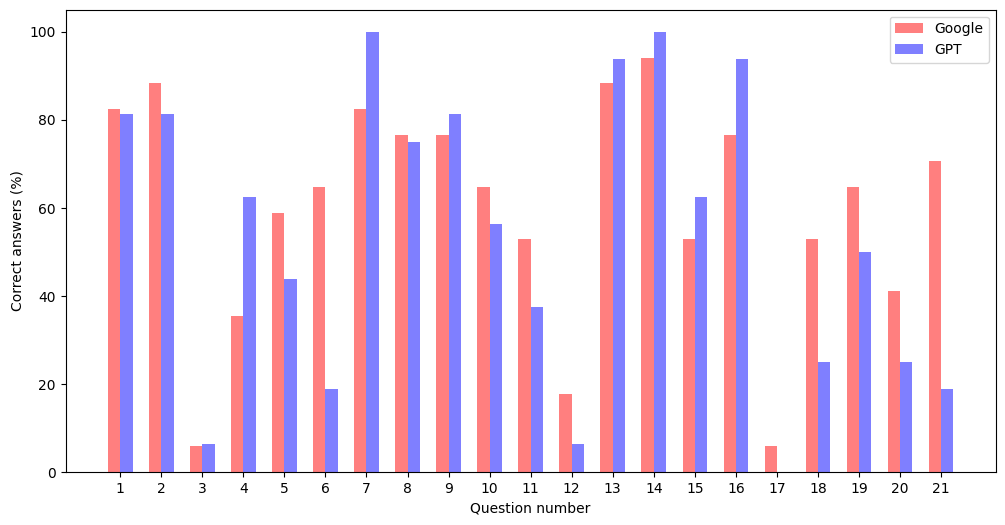

In [7]:
# Make bar plot of points in each question
import numpy as np
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1, len(df_google.columns))
ax.bar(x-0.15, df_google.iloc[:,:-1].sum(axis=0) /len(df_google.index) * 100, label="Google", width=0.3, color='red', alpha=0.5)
ax.bar(x+0.15, df_gpt.iloc[:,:-1].sum(axis=0) /len(df_gpt.index) * 100, label="GPT", width=0.3, color = 'blue', alpha=0.5)
ax.set_xticks(x)
ax.set_xlabel("Question number")
ax.set_ylabel("Correct answers (%)")
#ax.set_title("Average points for each question")
ax.legend()
plt.savefig("figs/accuracy_questions.pdf", bbox_inches='tight')
plt.show()


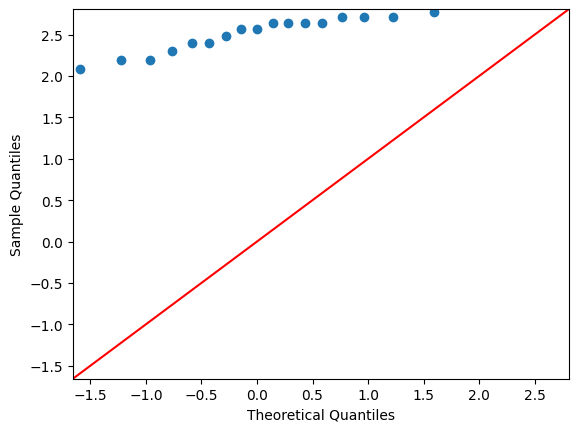

In [8]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

# total array
total_array = df_google["Total"].to_numpy()

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(np.log(total_array), line='45')

plt.savefig("figs/qqplot.png", bbox_inches='tight')
plt.show()

In [9]:
import scipy.stats as stats

# Example data (replace these with your own data)
group_google = df_google["Total"].to_numpy()
group_chat = df_gpt["Total"].to_numpy()

# Perform Wilcoxon rank-sum test
statistic, p_value = stats.mannwhitneyu(group_google, group_chat, alternative='two-sided')

# Analysis of the result
alpha = 0.05  # Significance level
print(f"U statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("The data suggest there is a significant difference between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("The data suggest there is no significant difference between the two groups.")

U statistic: 183.0
P-value: 0.09126505482695717
Conclusion: Fail to reject the null hypothesis.
The data suggest there is no significant difference between the two groups.


In [10]:
import scipy.stats as stats

# Example data (replace these with your own data)
group_google = df_google["Total"].to_numpy()
group_chat = df_gpt["Total"].to_numpy()

# Perform Wilcoxon rank-sum test
statistic, p_value = stats.mannwhitneyu(group_google, group_chat, alternative='greater')

# Analysis of the result
alpha = 0.05  # Significance level
print(f"U statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("The data suggest there is a significant difference between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("The data suggest there is no significant difference between the two groups.")

U statistic: 183.0
P-value: 0.045632527413478584
Conclusion: Reject the null hypothesis.
The data suggest there is a significant difference between the two groups.


# Analysis of "Don't Know" answers

In [11]:
# Get all the don't knows
answers_google = df_google_copy.iloc[:,3:]
answers_gpt = df_gpt_copy.iloc[:,3:]

# get every other column
answers_google = answers_google.iloc[:,::2]
answers_gpt = answers_gpt.iloc[:,::2]

# rename to question number
answers_google.columns = [f'Dont know Q{i+1}' for i in range(len(answers_google.columns))]
answers_gpt.columns = [f'Dont know Q{i+1}' for i in range(len(answers_gpt.columns))]

# Replace all the answers with 0 unless it is "Don't know"
answers_google = answers_google.map(lambda x: 1 if x == "Don't know" else 0)
answers_gpt = answers_gpt.map(lambda x: 1 if x == "Don't know" else 0)

# Calculate the total don't knows
answers_google['Total'] = answers_google.sum(axis=1)
answers_gpt['Total'] = answers_gpt.sum(axis=1)

In [12]:
# Summary statistics
print("Google")
display(answers_google["Total"].describe())

Google


count    17.000000
mean      2.235294
std       2.634611
min       0.000000
25%       0.000000
50%       2.000000
75%       3.000000
max      10.000000
Name: Total, dtype: float64

In [13]:
# Summary statistics
print("GPT")
display(answers_gpt["Total"].describe())

GPT


count    16.000000
mean      4.375000
std       3.364025
min       0.000000
25%       1.750000
50%       4.500000
75%       6.500000
max      10.000000
Name: Total, dtype: float64

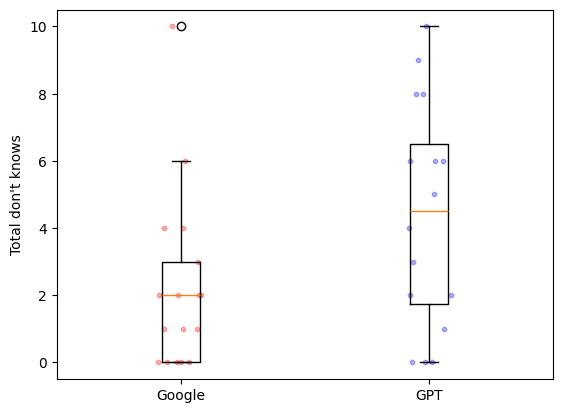

In [14]:
# make box plot
positions = [1, 2]
plt.boxplot([answers_google["Total"], answers_gpt["Total"]], tick_labels=["Google", "GPT"])
datapoints_google_jitter = [positions[0]]*len(answers_google["Total"])
datapoints_google_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_google_jitter]

datapoints_gpt_jitter = [positions[1]]*len(answers_gpt["Total"])
datapoints_gpt_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_gpt_jitter]
plt.scatter(datapoints_google_jitter, answers_google["Total"], alpha=0.3,s = 10, color='r', label='N =' + str(len(answers_google["Total"])))
plt.scatter(datapoints_gpt_jitter, answers_gpt["Total"], alpha=0.3, s=10, color='b', label='N = '+ str(len(answers_gpt["Total"])))
plt.ylabel("Total points")
plt.ylabel("Total don't knows")
#plt.title("Total don't knows for Google and GPT")
plt.savefig("figs/boxplot_total_dont_knows.pdf", bbox_inches='tight')
plt.show()


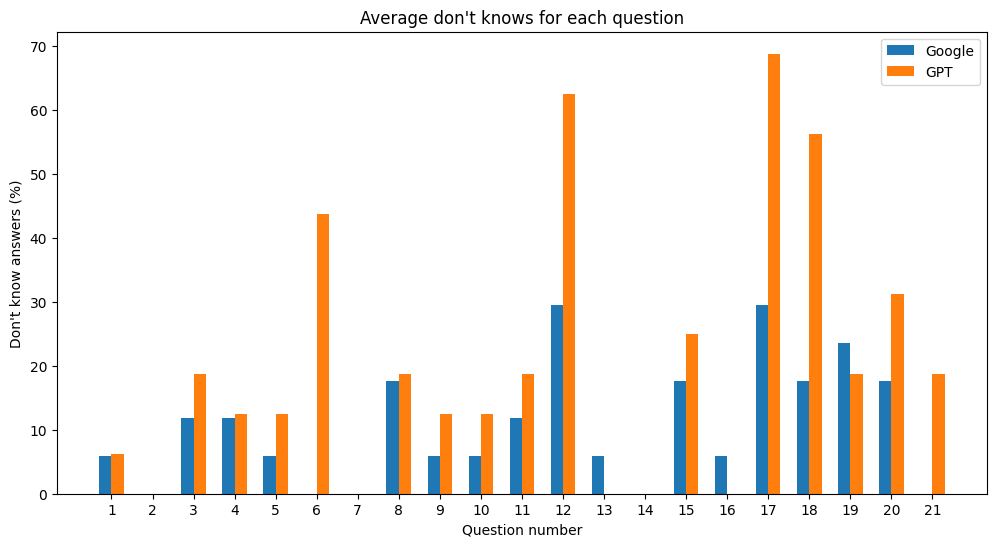

In [15]:
# Make bar plot of don't knows in each question
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1, len(answers_google.columns))
ax.bar(x-0.15, answers_google.iloc[:,:-1].sum(axis=0) /len(answers_google.index) * 100, label="Google", width=0.30)
ax.bar(x+0.15, answers_gpt.iloc[:,:-1].sum(axis=0) /len(answers_gpt.index) * 100, label="GPT", width=0.30)
ax.set_xticks(x)
ax.set_xlabel("Question number")
ax.set_ylabel("Don't know answers (%)")
ax.set_title("Average don't knows for each question")
ax.legend()
plt.show()

# Completion time analysis


In [16]:
df_google = pd.read_excel('data/Google_.xlsx')
df_gpt = pd.read_excel('data/ChatGPT_.xlsx')

# set id to index
df_google.set_index('ID', inplace=True)
df_gpt.set_index('ID', inplace=True)

# Keep only start and end time and total points
df_google = df_google[['Start time', 'Completion time', 'Total points']]
df_gpt = df_gpt[['Start time', 'Completion time', 'Total points']]

# Calculate time spent
df_google['Time spent'] = (df_google['Completion time'] - df_google['Start time']).dt.total_seconds() / 60
df_gpt['Time spent'] = (df_gpt['Completion time'] - df_gpt['Start time']).dt.total_seconds() /60

# Summary statistics
print("Google")
display(df_google['Time spent'].describe())

print("GPT")
display(df_gpt['Time spent'].describe())

Google


count    17.000000
mean      6.434314
std       1.964012
min       3.400000
25%       5.116667
50%       5.900000
75%       7.933333
max       9.883333
Name: Time spent, dtype: float64

GPT


count    16.000000
mean      5.767708
std       2.336620
min       2.433333
25%       4.141667
50%       5.391667
75%       6.900000
max       9.716667
Name: Time spent, dtype: float64

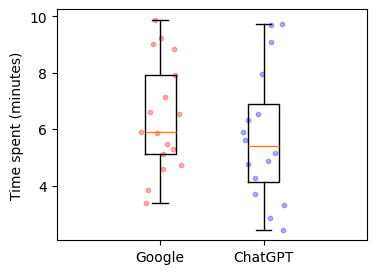

In [17]:
# Make box plot over total 
import random
random.seed(10)

positions = [0, 0.5]
plt.figure(figsize=(4, 3))
plt.boxplot([df_google["Time spent"], df_gpt["Time spent"]], tick_labels=["Google", "ChatGPT"], positions=positions)
# plot datapoints on top
datapoints_google_jitter = [positions[0]]*len(df_google["Time spent"])
datapoints_google_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_google_jitter]

datapoints_gpt_jitter = [positions[1]]*len(df_gpt["Time spent"])
datapoints_gpt_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_gpt_jitter]
plt.scatter(datapoints_google_jitter, df_google["Time spent"], alpha=0.3,s = 10, color='r', label='N =' + str(len(df_google["Time spent"])))
plt.scatter(datapoints_gpt_jitter, df_gpt["Time spent"], alpha=0.3, s=10, color='b', label='N = '+ str(len(df_gpt["Time spent"])))
plt.ylabel("Time spent (minutes)")
plt.savefig("figs/boxplot_time.pdf", bbox_inches='tight')
plt.show()